In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

In [2]:
data = pd.read_csv('cdc_NAL.csv')
data.head(10)

,Unnamed: 0,test_date,nid,gender,naics,age_group,region,NAICS_descr,500k,1k,...,8k,right_ear,H_3FA,IG_500k,IG_1k,IG_2k,IG_3k,IG_4k,IG_6k,IG_8k
0,0,12-FEB-2007,1,M,331512,4,MA,Steel Investment Foundries,20.0,20.0,...,45.0,1,16.666667,0.70,9.70,4.60,3.60,8.25,9.80,14.45
1,1,29-FEB-2008,2,M,331512,3,MA,Steel Investment Foundries,10.0,0.0,...,15.0,1,6.666667,-3.90,2.00,3.10,3.65,8.30,5.20,3.65
2,2,08-FEB-2006,3,M,331512,3,MA,Steel Investment Foundries,20.0,20.0,...,30.0,1,16.666667,0.70,9.70,4.60,5.15,12.90,9.80,9.80
3,3,29-FEB-2008,6,M,331512,4,MA,Steel Investment Foundries,10.0,10.0,...,20.0,1,8.333333,-3.65,5.35,1.80,8.55,10.10,7.00,5.45
4,4,08-FEB-2006,8,M,331512,3,MA,Steel Investment Foundries,15.0,15.0,...,5.0,1,11.666667,-1.60,7.40,2.30,12.15,15.25,5.95,1.30
5,5,29-FEB-2008,9,M,331512,3,MA,Steel Investment Foundries,5.0,0.0,...,20.0,1,3.333333,-5.95,1.50,1.05,0.05,0.05,0.05,4.70
6,6,29-FEB-2008,10,M,331512,2,MA,Steel Investment Foundries,10.0,5.0,...,0.0,1,6.666667,-3.90,3.55,1.55,0.55,0.55,0.55,-1.00
7,7,29-FEB-2008,11,M,331512,5,MA,Steel Investment Foundries,25.0,20.0,...,50.0,1,26.666667,3.75,11.20,13.85,22.15,22.15,23.70,17.50
8,8,29-FEB-2008,12,M,331512,3,MA,Steel Investment Foundries,10.0,15.0,...,20.0,1,10.000000,-3.40,7.15,2.05,7.25,11.90,2.60,5.70
9,9,08-FEB-2005,13,M,331512,5,MA,Steel Investment Foundries,10.0,10.0,...,20.0,1,10.000000,-3.40,5.60,3.60,2.60,5.70,1.05,5.70


In [3]:
by_age = data.groupby('age_group').agg(np.mean)
by_age

,Unnamed: 0,nid,naics,500k,1k,2k,3k,4k,6k,8k,right_ear,H_3FA,IG_500k,IG_1k,IG_2k,IG_3k,IG_4k,IG_6k,IG_8k
age_group,,,,,,,,,,,,,,,,,,,
1,520517.208847,1.582047e+06,399426.303100,8.303375,6.263113,6.443820,7.035766,8.631719,11.634900,8.920705,0.499995,7.003436,-4.375533,3.986753,2.043834,1.227970,1.722679,2.653630,1.812240
2,497296.618368,1.480200e+06,380165.242816,8.551281,7.113764,7.589414,9.318772,12.392018,14.952265,12.019347,0.499985,7.751486,-4.186483,4.361819,2.510497,2.047290,3.000007,3.793662,2.884468
3,510986.992379,1.514839e+06,377268.179217,9.296453,8.426970,9.711253,14.001917,19.068657,21.031399,18.128320,0.499992,9.144892,-3.746534,4.975634,3.375487,3.706525,5.277173,5.885564,4.985622
4,516958.064313,1.532643e+06,374705.676778,10.661432,10.280518,13.376620,21.167549,28.068313,29.759599,28.054993,0.500002,11.439523,-2.979354,5.889705,4.852214,6.268770,8.407971,8.932135,8.403713
5,489415.702620,1.448194e+06,369221.603507,12.904717,13.280177,19.975823,31.273610,39.105918,41.603887,41.823072,0.500061,15.386906,-1.692365,7.402288,7.482617,9.987220,12.415066,13.189368,13.257329


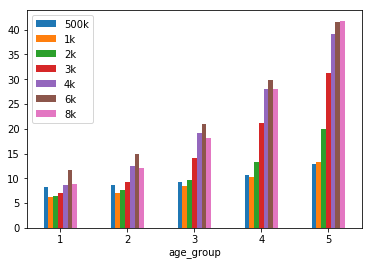

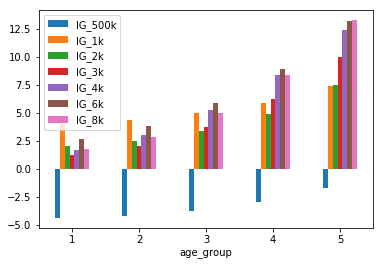

In [4]:
by_age.plot.bar(y=['500k','1k', '2k', '3k', '4k', '6k', '8k'], rot=360)
by_age.plot.bar(y=['IG_500k','IG_1k', 'IG_2k', 'IG_3k', 'IG_4k', 'IG_6k', 'IG_8k'], rot=360)

In [5]:
by_industry = data.groupby('NAICS_descr').agg(np.mean)
by_industry.head(10)

,Unnamed: 0,nid,naics,age_group,500k,1k,2k,3k,4k,6k,8k,right_ear,H_3FA,IG_500k,IG_1k,IG_2k,IG_3k,IG_4k,IG_6k,IG_8k
NAICS_descr,,,,,,,,,,,,,,,,,,,,
Abrasive Product Manufacturing,9.518643e+05,2.941346e+06,327910.0,3.310421,10.232816,8.375831,10.238359,15.182927,21.114191,21.740576,22.322616,0.5,9.615669,-3.386327,5.028030,3.607631,4.141556,5.980248,6.174427,6.354860
Adhesive Manufacturing,8.989212e+04,2.136896e+05,325520.0,3.058714,10.866729,9.417521,11.092731,15.738583,20.046598,21.330382,19.592265,0.5,10.458993,-3.062465,5.488281,4.007596,4.447810,5.783295,6.181267,5.642451
Administration of Air and Water Resource and Solid Waste Management Programs,2.832465e+05,7.344101e+05,924110.0,3.534247,8.938356,8.356164,11.609589,19.828767,26.061644,31.609589,28.356164,0.5,9.634703,-3.783904,5.035616,4.044178,5.592123,7.524315,9.244178,8.235616
Administration of Conservation Programs,3.990266e+05,7.700324e+05,924120.0,2.350595,6.383929,6.811012,7.636905,11.093750,14.946429,18.348214,17.449405,0.5,6.943948,-4.980278,4.141404,2.399812,2.472624,3.666954,4.721508,4.442877
Administration of Education Programs,1.047207e+06,3.107252e+06,923110.0,3.384615,11.634615,11.490385,12.596154,17.259615,22.884615,25.192308,23.846154,0.5,11.907051,-2.610737,6.171474,4.552724,5.017628,6.761378,7.476763,7.059455
Administration of General Economic Programs,1.299120e+05,2.190045e+05,926110.0,3.047619,8.333333,7.539683,7.976190,11.626984,17.896825,18.888889,17.817460,0.5,7.949735,-4.224206,4.529762,2.665079,2.796825,4.740476,5.048016,4.715873
"Administration of Human Resource Programs (except Education, Public Health, and Veterans' Affairs Programs)",9.977390e+05,3.024627e+06,923130.0,3.373134,8.619403,7.985075,11.492537,19.664179,27.350746,30.820896,26.343284,0.5,9.365672,-3.923134,4.880224,3.967537,5.500746,7.883582,8.959328,7.571269
Administration of Public Health Programs,6.578520e+05,2.387377e+06,923120.0,3.380597,10.223881,10.391791,13.712687,18.861940,24.766791,27.733209,26.417910,0.5,11.442786,-3.113246,5.770896,4.837687,5.452612,7.283116,8.202705,7.794963
Administration of Urban Planning and Community and Rural Development,1.106950e+06,3.201491e+06,925120.0,3.350000,10.375000,10.250000,17.000000,26.750000,35.125000,28.250000,28.750000,0.5,12.541667,-2.902500,6.058750,6.151250,8.173750,10.770000,8.638750,8.793750


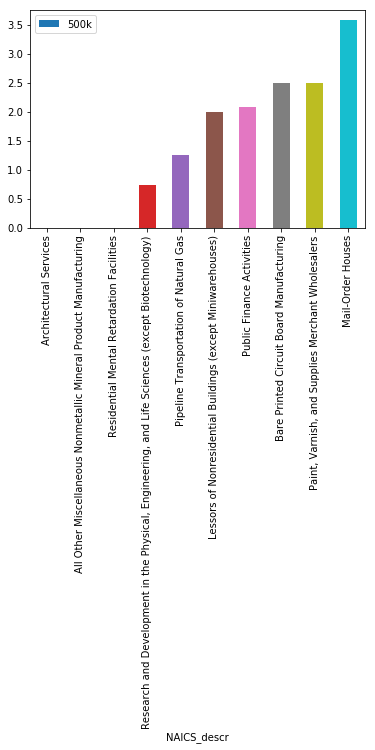

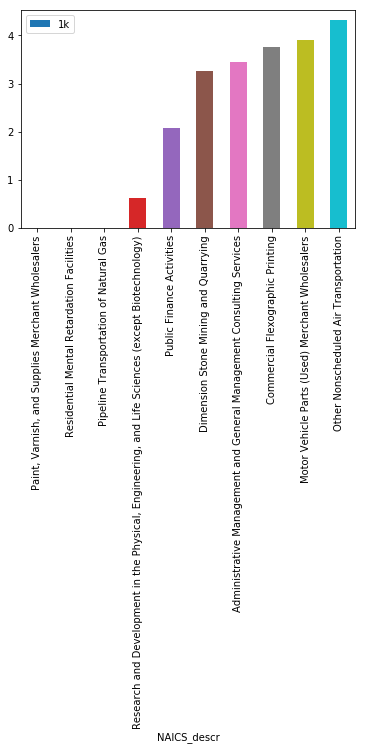

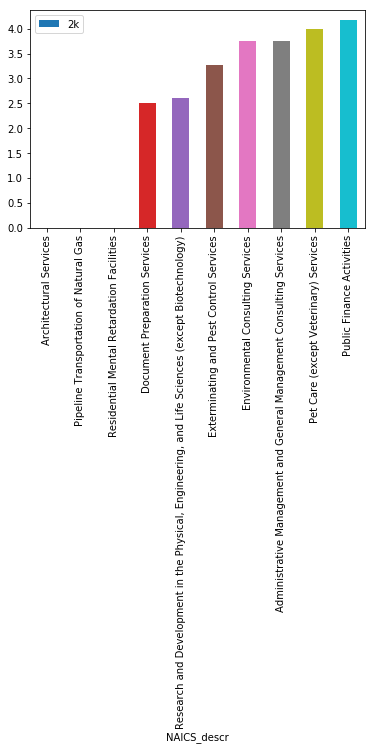

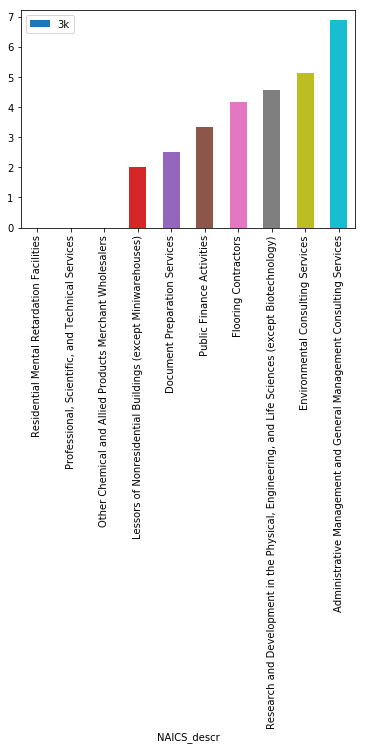

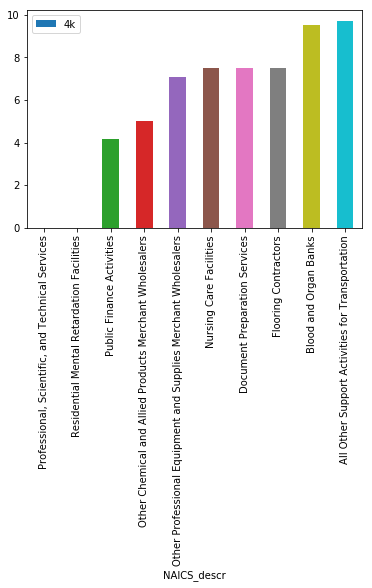

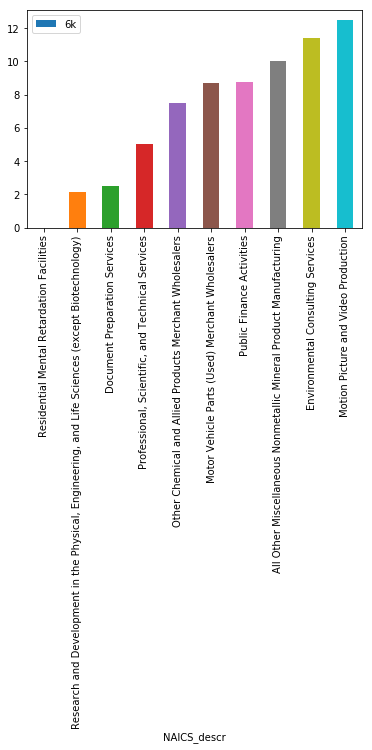

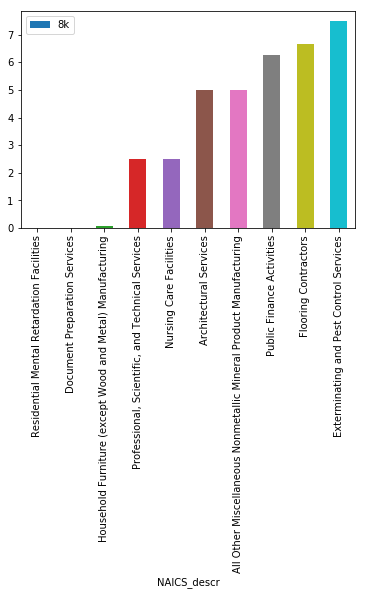

In [6]:
for i in np.array(['500k','1k', '2k', '3k', '4k', '6k', '8k']):
    by_industry.sort_values(i).take(np.arange(10)).plot.bar(y=i)


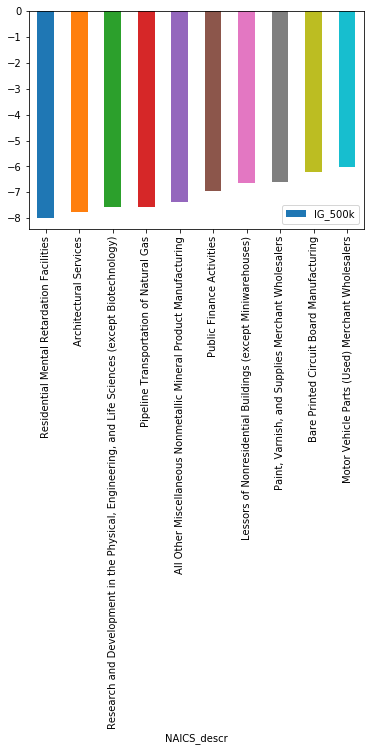

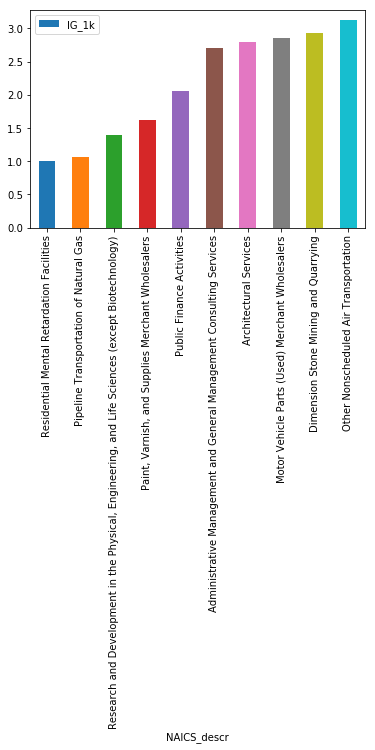

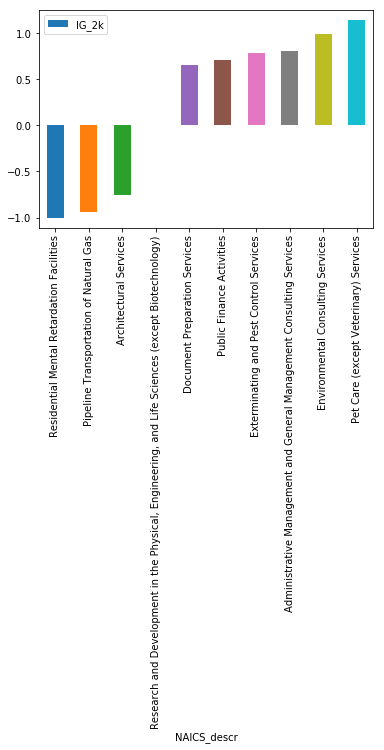

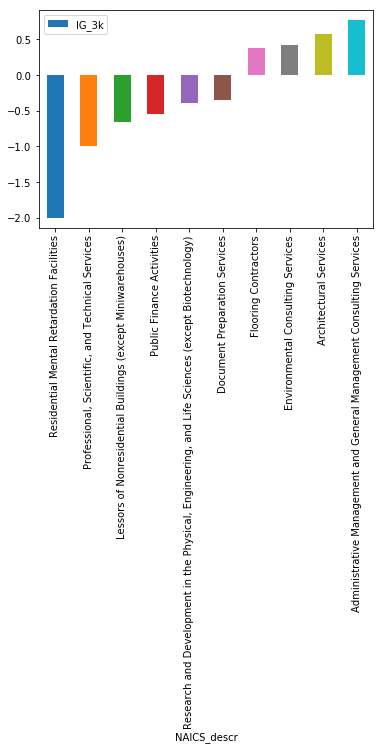

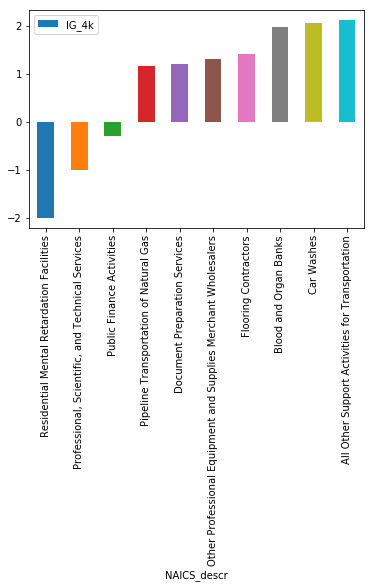

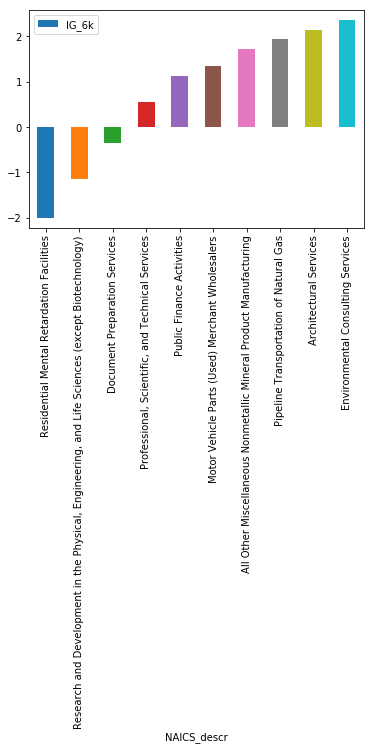

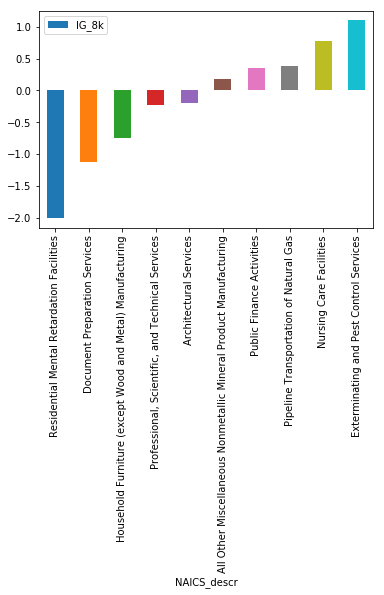

In [7]:
for i in np.array(['IG_500k','IG_1k', 'IG_2k', 'IG_3k', 'IG_4k', 'IG_6k', 'IG_8k']):
    by_industry.sort_values(i).take(np.arange(10)).plot.bar(y=i)

In [15]:
by_gender = data.groupby('gender').agg(np.mean)
by_gender

,Unnamed: 0,nid,naics,age_group,500k,1k,2k,3k,4k,6k,8k,right_ear,H_3FA,IG_500k,IG_1k,IG_2k,IG_3k,IG_4k,IG_6k,IG_8k
gender,,,,,,,,,,,,,,,,,,,,
F,491667.721496,1.455680e+06,377905.277547,2.810976,9.885348,8.304855,9.350763,9.792648,12.316196,17.556565,15.668456,0.499988,9.180322,-3.558712,4.941873,3.268072,2.406118,3.188464,4.812913,4.227594
M,513214.580265,1.532697e+06,381520.314521,2.792627,9.494348,8.655105,10.664280,16.170502,21.340755,22.832780,20.406582,0.500003,9.604578,-3.616313,5.114034,3.738866,4.446835,6.049551,6.512016,5.759910


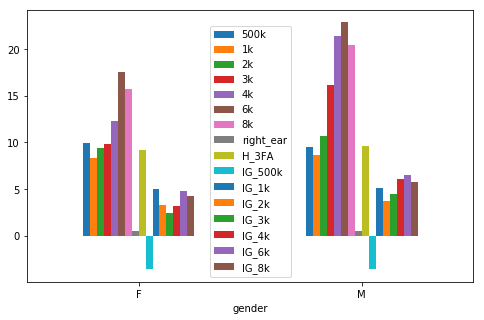

In [23]:
df2 = by_gender.iloc[:,4:].plot.bar(figsize=(8,5), legend = True, rot=360)